<a href="https://colab.research.google.com/github/hereiskunalverma/Random_Repository/blob/main/SoundCompressionUsingClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sound Compression with K-Means Algorithm

In [65]:
# Importing useful libraries
import scipy.io.wavfile
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import IPython

In [9]:
sample = '/content/sample.wav'
fs, y = scipy.io.wavfile.read(sample)
X = np.array(y.copy())
X.shape

(32000, 2)

# Visualize the wave file

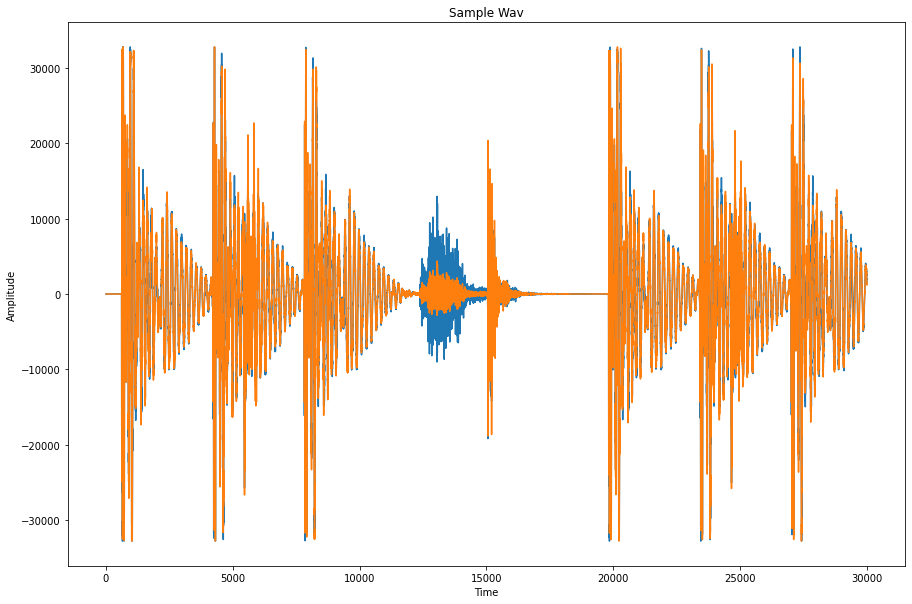

In [17]:
# read audio samples
input_data = scipy.io.wavfile.read("sample.wav")
audio = input_data[1]

# plot the samples
plt.figure(figsize=(15,10), facecolor='white')
plt.plot(audio[0:30000])
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sample Wav")
# display the plot
plt.show()

# Implement K-Means Algorithm

## Finding optimal number of clusters

In [23]:
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, random_state=42, init='k-means++').fit(X) 
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

### plotting inertia vs cluster curve

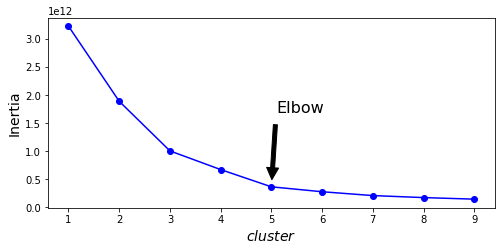

In [30]:
plt.figure(figsize=(8, 3.5), facecolor='white')
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$cluster$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(5, inertias[4]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

### plotting silhouette score vs cluster curve

`Note`: Higher the silhouette score for the cluster, the best it is.

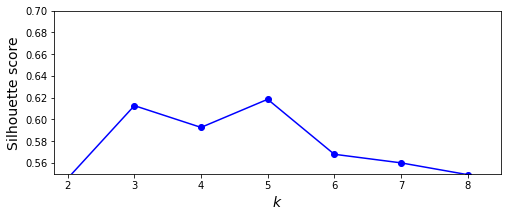

In [29]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3), facecolor='white')
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

From the above two curves, we can see that there are two `(3 and 5)` clusters which are quite good.

## Using the best cluster 

In [31]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Replacing each amplitude value with its centroid

In [33]:
compressed_wave = kmeans.cluster_centers_[kmeans.labels_]


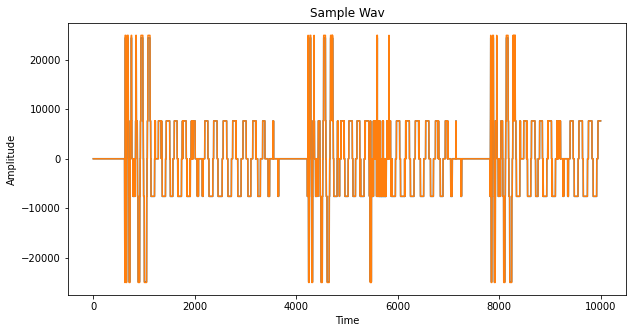

In [38]:

# plot the samples
plt.figure(figsize=(10,5), facecolor='white')
plt.plot(compressed_wave[0:10000])
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sample Wav")
# display the plot
plt.show()


# Saving compressed wave file

In [41]:
scipy.io.wavfile.write('compressed_sample.wav', fs, np.array(compressed_wave, dtype=np.int16))

Original Sound Wave

In [42]:
IPython.display.Audio("sample.wav")

Compressed Sound Wave

In [43]:
IPython.display.Audio("compressed_sample.wav")

# Compressin Using provided centroid initialization 

`Note`: Make sure the array for the custom centroid initialization is of shape ***(n_clusters, n_features)***

In [67]:
cent3 = pd.read_csv('cents2.txt', header=None, delimiter=' ') # for 5 centroids
print(cent3.head())
cent_init_3 = cent3.iloc[0:5, :].values
cent_init_3.shape

              0             1
0     23.320807     -9.889179
1 -10794.424500 -10787.702200
2  25709.846900  26166.173400
3   2946.209280   2818.413960
4 -29672.230200 -29711.045200


(5, 2)

In [68]:
kmeans = KMeans(n_clusters=5, init=cent_init_3)
kmeans.fit(X)
compressed_wave = kmeans.cluster_centers_[kmeans.labels_]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  


In [69]:
scipy.io.wavfile.write('compressed_sample.wav', fs, np.array(compressed_wave, dtype=np.int16))
IPython.display.Audio('compressed_sample.wav')